# Exercise 3.  Concentrations of epinephrine

#### First load in the dogs.txt file

In [29]:
dogs = read.table("dogs.txt",header=TRUE)

### 3A)  Is it reasonable to assume that the tree columns of dogs.txt were taken from normal populations?


	Shapiro-Wilk normality test

data:  dogs$isofluorane
W = 0.83093, p-value = 0.03434


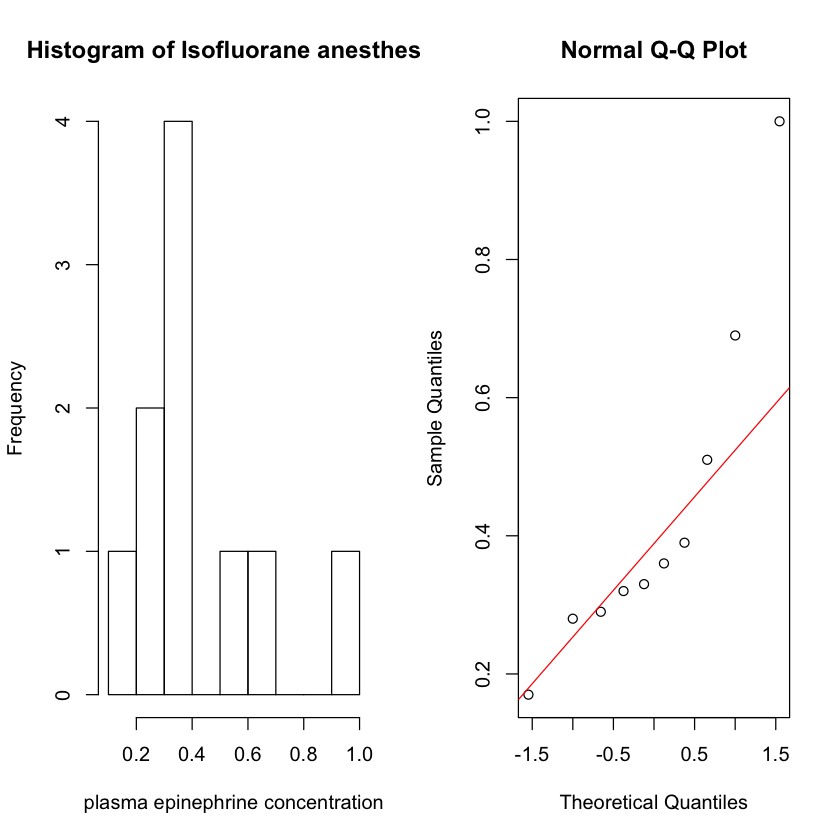


	Shapiro-Wilk normality test

data:  dogs$halothane
W = 0.9234, p-value = 0.3862


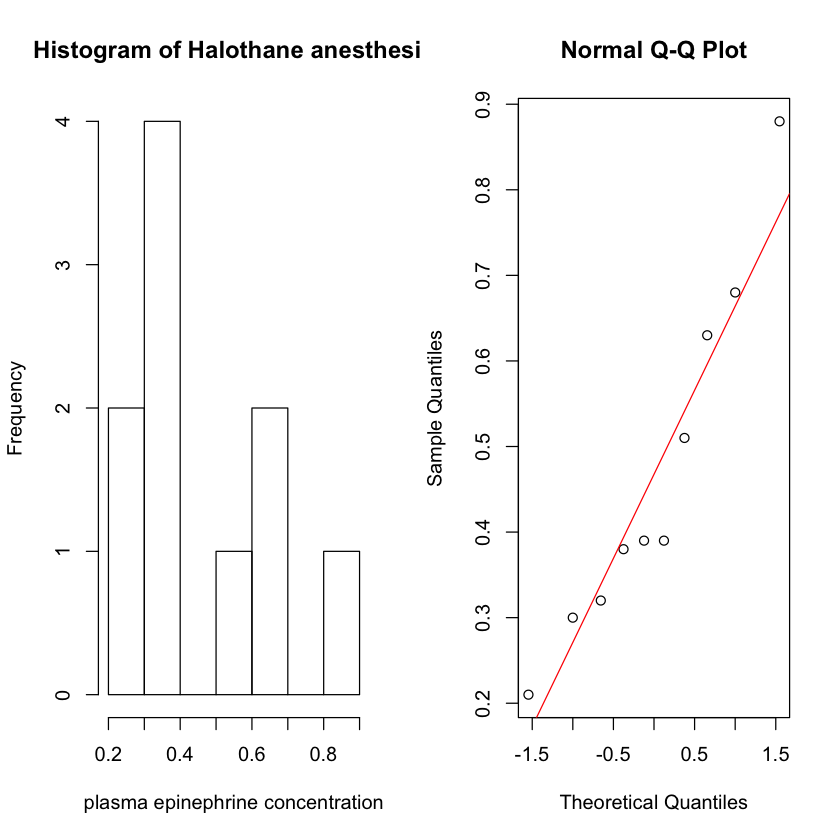


	Shapiro-Wilk normality test

data:  dogs$cyclopropane
W = 0.93334, p-value = 0.4815


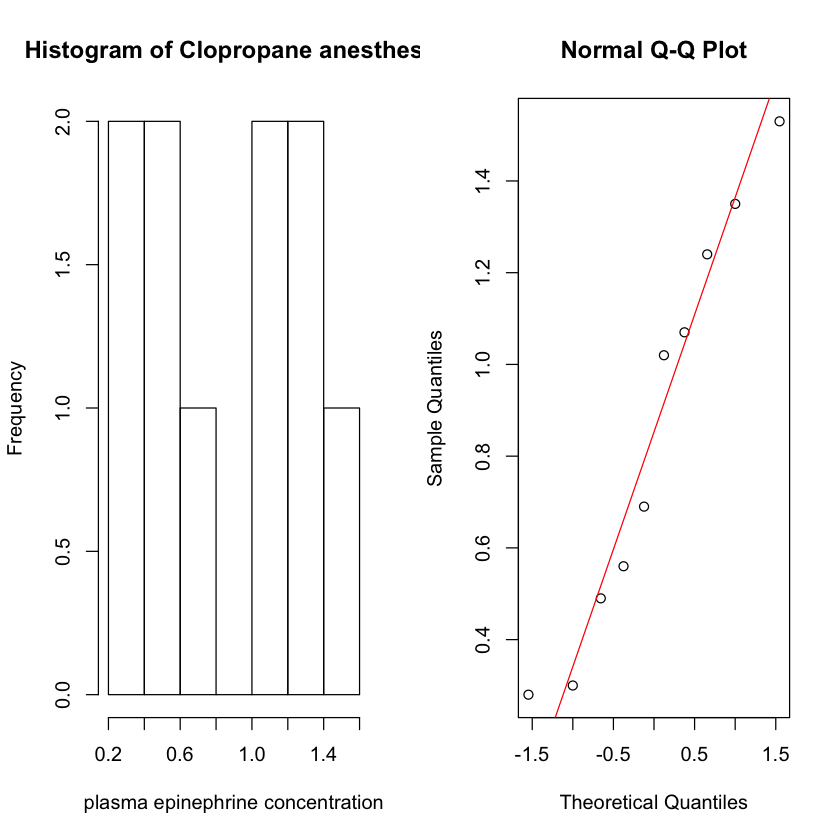

In [30]:
par(mfrow=c(1,2))

hist(dogs$isofluorane, breaks = 8, xlab = 'plasma epinephrine concentration', main = 'Histogram of Isofluorane anesthesia')
qqnorm(dogs$isofluorane) ; qqline(dogs$isofluorane, col = 'red')
shapiro.test(dogs$isofluorane)

hist(dogs$halothane, breaks = 8,  xlab = 'plasma epinephrine concentration', main = 'Histogram of Halothane anesthesia')
qqnorm(dogs$halothane) ; qqline(dogs$halothane, col = 'red')
shapiro.test(dogs$halothane)

hist(dogs$cyclopropane, breaks = 8,  xlab = 'plasma epinephrine concentration', main = 'Histogram of Clopropane anesthesia')
qqnorm(dogs$cyclopropane) ; qqline(dogs$cyclopropane, col = 'red')
shapiro.test(dogs$cyclopropane)

In order to investigate whether all three columns of the dataset are possibly originated from a normal distribution (population), respectively a histogram, QQ-plot and a Shapiro-Wilk test were constructed for each sample set.

Column 1 isofluorane: Both the histogram as the QQ-plot do not show a clear normal distribution. After executed the Shapiro-Wilk test on this sample set, it is shown that the p-value is 0.03434.
The p-value is smaller (<) than 0.05, implying that the null hypotheses -- stating that normality holds -- is rejected. 
This rejection would indicate that the data are not consistent with being a random sample from a population that has a normal distribution.

Column 2 halothane: The histogram does not show a clear bell-shaped distribution, whereas the QQ-plot does imply normality more clear. After executed the Shapiro-Wilk test on this sample set, it is shown that the p-value is 0.3862.
The p-value is greater (>) than 0.05, implying that the null hypotheses -- stating that normality holds -- is not rejected. 
The distribution of the data is not significantly different from normal distribution, we can assume normality according to this test.

Column 3 cyclopropane: The histogram does not show a normal distribution (rather shows a bi-modal distribution), while the QQ-plot reasonably assumes normality. After executed the Shapiro-Wilk test on this sample set, it is shown that the p-value is 0.4815.
The p-value is greater (>) than 0.05, implying that the null hypotheses -- stating that normality holds -- is not rejected. 
The distribution of the data is not significantly different from normal distribution, we can assume normality according to this test.

Since the sample sizes (10) are fairly small, it's difficult to assume if the three columns originate from a normally distributed population. Therefore, it is not reasonable to state normality for the sample sets without considering the afformentioned constraints.
Besides, the generated normality checks above do not uniformly imply a normal distribution. 

### 3B)  Investigate whether the columns isofluorane and halothane are correlated. Apply relevant tests to verify whether the distributions of these columns are different. Is a permutation test applicable?

#### Check correlations (observations)

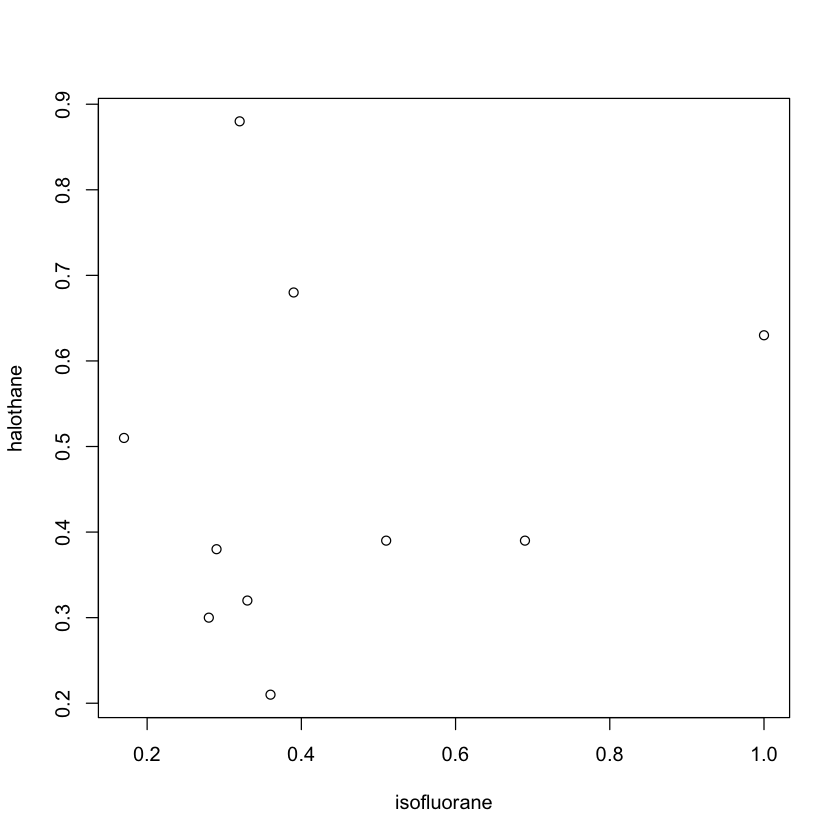

In [31]:
par(mfrow=c(1,1))
isofluorane = dogs$isofluorane
halothane = dogs$halothane
plot(isofluorane,halothane)

Based on observations in the scatterplot, we do not expect a correlation between the two variables.

#### Now, compute correlation scores

In [32]:

cor(isofluorane, halothane, method = 'pearson') 


[1] 0.1582896

The generated correlation score is 0.1582896. This indicates that there is a minimal positve correlation between isofluorane and halothane (since the score is greater than 0 and positive).

However, since the score is close to 0, it is reasonable to assume that the two variables are independent. This means that as one variable increases, there is no tendency in the other variable to either decrease or increase.

Hence, it is fair to conclude (from this result) that the two variables are independend from each other.

But as our observed data plots indicate (see 3A), normality cannot be fully claimed without any doubts. 

Therefore, it is more reasonable to conduct a Spearman correlation test that does not depend on normality and uses ranked values instead of raw data. 

In [33]:
cor(isofluorane, halothane, method='spearman')

[1] 0.218846

The generated correlation score is 0.2188466. This indicates that there is, again, a minimal positve correlation between isofluorane and halothane (since the score is greater than 0 and positive).

However, general assumptions on correlation scores (r) indicate that when r<0.25 there is little to no relationship between the two variables.

Hence, we can assume that this is also the case with the acquired Spearman correlation score result.

#### Are distributions of these columns different?

To verify whether the distributions of these two variables are different, we could run a t-test. However, since both varbiables to not seem to be normally distributed, the t-test does not seem to be an appropriate test.

Therefore, we will run Mann-Whitney test and Kolmogorov-Smirnov test, as the two variables have equal distributions (see histograms in 3A).

Null hypothesis: The distributions of the isofluorane and halothane are not different.

Alternative hypothesis: The two variables isofluorane and halothane do not come from the same distribution.


In [34]:
wilcox.test(isofluorane, halothane, exact = FALSE)
ks.test(isofluorane, halothane)


	Wilcoxon rank sum test with continuity correction

data:  isofluorane and halothane
W = 41, p-value = 0.5196
alternative hypothesis: true location shift is not equal to 0


Warning message in ks.test(isofluorane, halothane):
“cannot compute exact p-value with ties”



	Two-sample Kolmogorov-Smirnov test

data:  isofluorane and halothane
D = 0.3, p-value = 0.7591
alternative hypothesis: two-sided


Since the p-values for both the Mann_Whitney test (p = 0.5196) and the Kolmogorov-Smirnov test (p = 0.7591) are greater than 0.05, we reject the null hypothesis.

We have sufficient evidence to say that the two variables come from the same distribution.

#### Is a permutation test applicable? (???)

Yes, a permutation test is applicable since its goal is to test the hypothesis that the groups under study have identical distributions.
The test is non-parametric, meaning that is does not assume an underlying distribution. Furthermore, any test statisic presses difference between the samples is valid.

### 3C) Conduct a one-way ANOVA to determine whether the type of drug has an effect on the concentration of plasma epinephrine. Give the estimated concentrations for each of the three anesthesia drugs.

#### Construct a boxplot and stripchart to get insight into the data

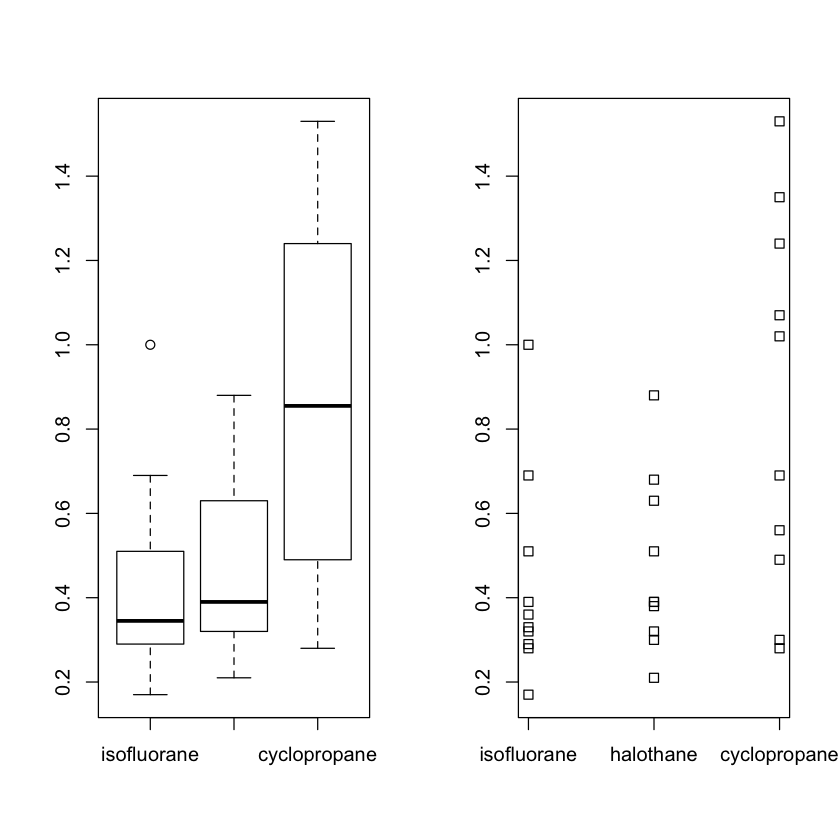

In [35]:
par(mfrow=c(1,2))
boxplot(dogs); stripchart(dogs,vertical=TRUE)

#### Generate a concatenated dataframe

In [36]:
treat=factor(rep(1:3,each=10),labels=c("iso","halo","cyclo"))
dogsdata=data.frame(plasma=as.vector(as.matrix(dogs)),treat)
head(dogsdata)

,plasma,treat
,<dbl>,<fct>
1,0.28,iso
2,0.51,iso
3,1.00,iso
4,0.39,iso
5,0.29,iso
6,0.36,iso


#### Perform R ANOVA Analysis

In [37]:
dogs_anova=lm(plasma~treat,data=dogsdata)
anova(dogs_anova)
anova_summary = summary(dogs_anova)
anova_summary
#confint(dogs_anova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
treat,2,1.080807,0.5404033,5.354966,0.01099659
Residuals,27,2.724740,0.1009163,NA,NA



Call:
lm(formula = plasma ~ treat, data = dogsdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5730 -0.1608 -0.0790  0.2000  0.6770 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4340     0.1005   4.320 0.000189 ***
treathalo     0.0350     0.1421   0.246 0.807266    
treatcyclo    0.4190     0.1421   2.949 0.006504 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3177 on 27 degrees of freedom
Multiple R-squared:  0.284,	Adjusted R-squared:  0.231 
F-statistic: 5.355 on 2 and 27 DF,  p-value: 0.011


#### Give the estimated concentrations for each of the three anesthesia drugs

In [38]:
sprintf("estimate isofluorane: %.3f", anova_summary$coefficients[1])
sprintf("estimate halothane: %.3f", (anova_summary$coefficients[1]+anova_summary$coefficients[2]))
sprintf("estimate cyclopropane: %.3f", (anova_summary$coefficients[1]+anova_summary$coefficients[3]))

[1] "estimate isofluorane: 0.434"

[1] "estimate halothane: 0.469"

[1] "estimate cyclopropane: 0.853"

#### Analysis ANOVA test

Null hypothesis: the means of the different groups are the same (the type of drug has no effect on the concentration of plasma epinephrine).

Alternative hypothesis: At least one sample mean is not equal to the others (the type of drug has an effect on the concentration of plasma epinephrine).

We want to know if there is any significant difference between the average plasma concentrations in the 3 experimental conditions.

As the p-value (0.01099659) is less than the significance level 0.05, we can conclude that there are significant differences between the groups.

Thus, the null-hypothesis is rejected.

#### Check whether the assumption of normality is not totally untrue

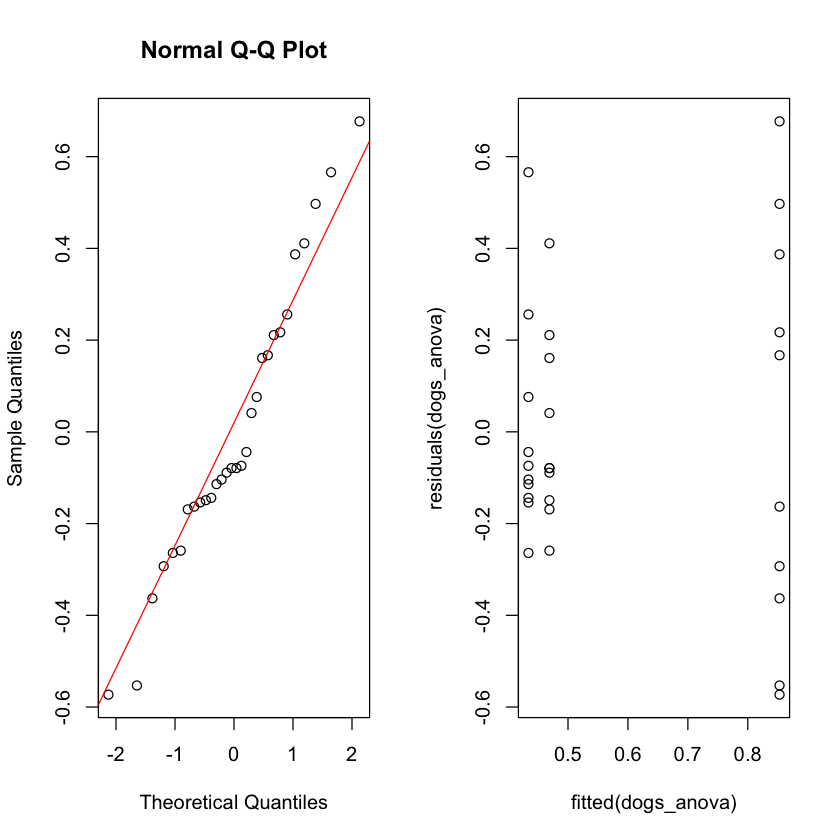

In [39]:
par(mfrow=c(1,2))
qqnorm(residuals(dogs_anova)) ; qqline(residuals(dogs_anova), col = 'red')
plot(fitted(dogs_anova),residuals(dogs_anova))

The assumption of normality is reasonably the case here, as the QQ-plot looks reasonably normal (the residuals do not seem to deviate significantly from normal).
And there is no pattern in the plot of fitted values and against residuals.

### 3D) Does the Kruskal-Wallis test arrive at the same conclusion about the effect of drug as the test in c)? Explain possible differences between conclusions of the Kruskal-Wallis and ANOVA tests. 

#### perform Kruskal_Wallis test

In [40]:
kruskal.test(plasma,treat)


	Kruskal-Wallis rank sum test

data:  plasma and treat
Kruskal-Wallis chi-squared = 5.6442, df = 2, p-value = 0.05948


#### Compare ANOVA and Kruskal-Wallis on p-values

In [41]:
anova_result = anova(dogs_anova)
kruskal_result = kruskal.test(plasma,treat)
sprintf("p-value Anova: %f", anova_result$`Pr(>F)`[1])
sprintf("p-value Kruskal-Wallis: %f", kruskal_result$p.value[1])

[1] "p-value Anova: 0.010997"

[1] "p-value Kruskal-Wallis: 0.059481"

#### Analysis of Kruskall-Wallis test outcomes

Null hypothesis: the means of the different groups are the same (the type of drug has no effect on the concentration of plasma epinephrine).

Alternative hypothesis: At least one sample mean is not equal to the others (the type of drug has an effect on the concentration of plasma epinephrine).







We want to know if there is any significant difference between the average plasma concentrations in the 3 experimental conditions.

As the p-value is greater than the significance level 0.05, we can conclude that there are no significant differences between the groups.

Thus, the null-hypothesis is not rejected.

#### Comparison between ANOVA and Kruskall-Wallis test outcomes

As can be observed from both obtained p-values, the one-way ANOVA does yield a significant difference, while the Kruskal-Wallis does not (under the assumption of a significance level of 0.05).

The conclusions are, therefore, different according to both tests. Whereas ANOVA implies an effect of the drug on the concentration of plasma epinephrine, Kruskal-Wallis does not.

These differences in p-values (and corresponding conclusions) can be related to the difference in nature of both tests.

For example, one-way ANOVA relies on normality to properly interpet the test outcomes, while Kruskal-Wallis does not rely on a normality assumption and is based on ranks. Therefore, if the data is not normally distributed, Kruskal-Wallis is the preffered test to execute.

By inspecting the histograms, QQ-plots and boxplots of all three drug treatments (thus the observable inspections), one cannot assume normality since the data is fairly skewed and the sample size (n=10) is relatively small to make clear assumptions whether the data is originated from a normally distributed population.

The Shapiro-Wilk test implies, however, that halothane and cyclopropane are normally distributed (H0 is not rejected). But since the visual observations do not indicate clear normality, the Shapiro-Wilk test is not supposed to execute the most reliable normality conclusions.

So, since it is reasonable to state that the data is not normally distributed, the Kruskal-Wallis test seems the more appropriate test to execute from the two since the ranks are not dependend on the absolute values. 

However, in case one assumes normality, ANOVA is the preffered test. And in the qqnorm plot of the residuals and the plot of fitted against residuals (see 3C), normality can be assumed, so the one-way ANOVA can validly be performed. 